In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'  #used to dsiplay animation in jupytor


**Defining the Initial Condition, $u_0 = \sin(\omega x)$ with  $\omega = 2\pi$**

In [23]:
n = 101  #number of grid points
L = 1.0
x = np.linspace(0,L,n)
dx = L/(n-1)

In [24]:
ω = 2.0*np.pi
μ = 0.05
c = 1.0
u0 = lambda x :np.sin(ω*x)
uexact = lambda x,t: u0(x-c*t)*np.exp(-μ*ω*ω*t)

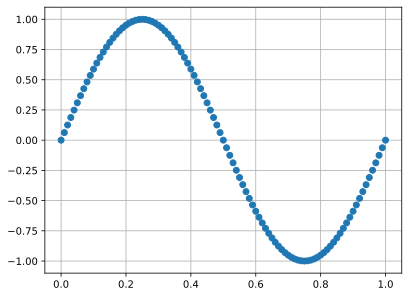

In [25]:
plt.plot(x, u0(x), 'o')
plt.grid()

## Forward in Time, Central in Space (FTCS)

In [30]:
dt = 0.001
tend = 1.0
t = 0.

cfl = 0.5*c*dt/dx
F0 = μ*dt/dx**2

sol = []
sol.append(u0(x))

while t<tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1] = un[1:-1] -cfl*(un[2:]-un[:-2])+ F0*(un[2:]-2.*un[1:-1]+un[:-2])
    unew[-1] = un[-1] - cfl*(un[1] - un[-2]) + F0*(un[1]-2.*un[-1]+un[-2])  #right boundary
    unew[0] = unew[-1] #left boundary
    sol.append(unew)
    t += dt

In [31]:
len(sol)

1001

**Plotting Animation**

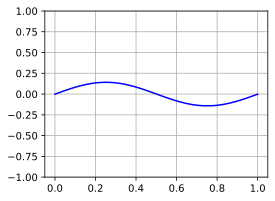

In [32]:
ims = []   #for stroing image data
fig = plt.figure(figsize = [4,3])
plt.grid()

i = 0

for solution in sol:
    if(i%10 == 0): #for everyy 10th time frame
        im = plt.plot(x,solution,'b-',animated = True)
        plt.ylim(-1,1)
        ims.append(im)
    i += 1
ani = animation.ArtistAnimation(fig, ims, interval =40, blit = True, repeat_delay=1000)
ani

## Play around with Input Parameters

### Case 1

$\Delta t = 0.05, n =21, \mu = 0.05 $


In [33]:
n = 21  #number of grid points
L = 1.0
x = np.linspace(0,L,n)
dx = L/(n-1)

ω = 2.0*np.pi
μ = 0.05
c = 1.0
u0 = lambda x :np.sin(ω*x)
uexact = lambda x,t: u0(x-c*t)*np.exp(-μ*ω*ω*t)

In [41]:
dt = 0.005
tend = 1.0
t = 0.

cfl = 0.5*c*dt/dx
F0 = μ*dt/dx**2

sol = []
sol.append(u0(x))

while t<tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1] = un[1:-1] -cfl*(un[2:]-un[:-2])+ F0*(un[2:]-2.*un[1:-1]+un[:-2])
    unew[-1] = un[-1] - cfl*(un[1] - un[-2]) + F0*(un[1]-2.*un[-1]+un[-2])  #right boundary
    unew[0] = unew[-1] #left boundary
    sol.append(unew)
    t += dt

In [42]:
sol_exact = []  #for exact solution
sol_exact.append(uexact(x,0))

t=0
while t< tend:
    t+=dt
    sol_exact.append(uexact(x,t))
    

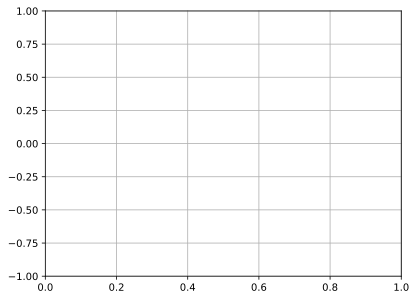

In [43]:
#for comparing computed and exact solution
#for plotting them on each other

fig = plt.figure()
axis = plt.axes(xlim = (0.0, 1.0), ylim=(-1,1))

#in each frame, we have to plot both solutions
#so we'll create 1D line object, using that we'll plot the graph

line1, = axis.plot([], [], 'bo', lw=2)  #it'll give the handle  #for exact sol
line2, = axis.plot([], [], 'r-', lw=2)  #for computed sol

axis.grid()

In [46]:
def init():
    line1.set_data([],[])      #empty list
    line2.set_data([],[])
    return line1,line2

def animate(i):
    line1.set_data(x,sol[i])
    line2.set_data(x,sol_exact[i])
    return line1,line2

anim = animation.FuncAnimation(fig, animate, init_func = init, frames= len(sol), interval = 10, blit = True)
anim